<a href="https://colab.research.google.com/github/eunzzae/KaggleStudy_MustHave/blob/main/Chap06_%EB%8C%80%ED%9A%8C_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter06. 자전거 대여 수요 예측

## 6-1) 경진대회 이해
* 본 대회는 플레이그라운드 대회이며, 보통 상금과 메달이 없는 경우가 많음   

  ※ 플레이그라운드 대회 : 난이도가 낮은 연습용 대회
---------------------------------------------------------------
* 피처와 타깃값이란??
  - 피처(독립변수, X) : 원하는 값을 예측하기 위해 활용하는 데이터
  - 타깃값(종속변수, Y) : 예측해야할 값(= 목푯값, 목표변수, 타깃변수)

## 6-2) 경진대회 접속 방법 및 세부메뉴
### ✅ 경진대회 접속 방법
1) 캐글 홈페이지 접속 → 2) 검색창에 대회명 입력 → 3) Competitions 영역 노출되는 대회 클릭

### ✅ 경진대회 메뉴 설명
* Overview
:경진대회 전반을 소개하는 메뉴
  - Description : 페이지에 경진대회 소개글 게재됨
  - Evaluation : 평가지표와 제출 형식 설명 → 등수 매기는데 사용됨
* Data : 하단의 Data Explorer 항목에서는 데이터를 미리 살펴볼 수 있음
* Code : 다른 참가자가 공유한 코드를 볼 수 있음
* Discussion : 인사이트, 주의사항, 질의응답 등 경진대회에 도움되는 내용이 게재됨
* Leaderboard : 참가자의 등수와 점수를 확인할 수 있음 \
* Rules : 대회 규정 게재
* Team : 팀 매칭

## 6-3)탐색적 데이터 분석

### ✅ 데이터 둘러보기
* 우선 데이터가 어떻게 구성되어 있는지 살펴보기

In [1]:
# 넘파이, 판다스 import
import numpy as np
import pandas as pd

In [2]:
# 데이터 경로
data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/Chap06. 자전거_대여_수요_예측/'

In [3]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [4]:
# 훈련데이터와 테스트 데이터 크기 확인
train.shape, test.shape

((10886, 12), (6493, 9))

* 피처 의미
  - datetime : 기록일시
  - holiday(공휴일 여부 0과 1)
  - weather(1:맑음, 2:옅은 안개,약간흐림, 3:약간의 눈, 약간의 비, 천둥번개,흐림, 4:폭우와 천둥번개, 눈과 짙은 안개)
  - temp : 실제 온도
  - atemp : 체감 온도
  - casual : 등록되지 않은 사용자 수(비회원 수)
  - count : 자전거 대여 수량 => **예측해야할 타깃값**


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* 테스트 데이터는 피처 수가 훈련 데이터보다 적음   
→ 훈련 데이터로 모델 훈련 후, 테스트 데이터로 대여 수량(count) 예측

  ※ 훈련 시에도 casual과 registered 피처를 제거해서 동일한 피처로 훈련

In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


* ID인 datetime은 데이터를 구분하는 역할   
→ 훈련 시 datetime 피처 제거

In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
train.info()  # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### ✅ 피처 엔지니어링

* Raw data 상태에서는 경향, 공통점, 차이 등을 찾기 어려울 수 있음  
→ 분석, 시각화 하기에 적합하도록 피처 변환

* datetime은 Object 타입  
→ 문자열처럼 다룰 수 있음

In [11]:
print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [13]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split("-")) # "-" 기준으로 문자열 나눈기
print(train['datetime'][100].split()[0].split("-")[0]) # 연도
print(train['datetime'][100].split()[0].split("-")[1]) # 월
print(train['datetime'][100].split()[0].split("-")[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [14]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(":")) # ":" 기준으로 문자열 나눈기
print(train['datetime'][100].split()[1].split(":")[0]) # 시간
print(train['datetime'][100].split()[1].split(":")[1]) # 분
print(train['datetime'][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


* 새로운 피처 생성

In [15]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

* 모델을 훈련할 때는 피처값을 숫자로만 변경  
→ 머신러닝은 피처를 숫자로만 인식하기 때문   
단, 아래에서는 그래프로 쉽게 알아보기 위해 요일 피처를 문자열로 변경

In [20]:
from datetime import datetime # datetime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])


2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [21]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [22]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstrom',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Flog'})

* season, weather, date, hour 피처 추가
* season, weather 피처는 숫자에서 문자로 변환  
⇒  date 피처는 year, month, day 피처에도 있어서 제거함
month 피처는 더 큰 분류인 season으로 분류하므로 제거함


In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### ✅ 데이터 시각화


In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### ✏️ 분포도  
: 수치형 데이터의 집계값을 나타내는 그래프   
※ 집계값: 총 개수 또는 비율

* 해석  
→ 타깃값이 0 근처로 편향되어 있음, 좋은 성능을 내기 어려워 보임  
회귀모델이 좋은 성능을 내기 위해서는 데이터가 정규분포를 따라야 함.

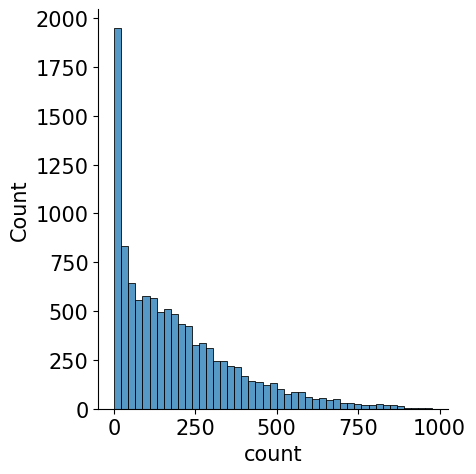

In [25]:
mpl.rc('font', size = 15) # 폰트 크기를 15로 설정
sns.displot(train['count']) # 분포도 출력

* log변환 → 데이터 분포를 정규분포에 가깝게 만듦   
  ⇒ 타깃값을 log(count)로 변환해서 사용하고, 마지막에(후처리) 지수변환하여 count로 복원

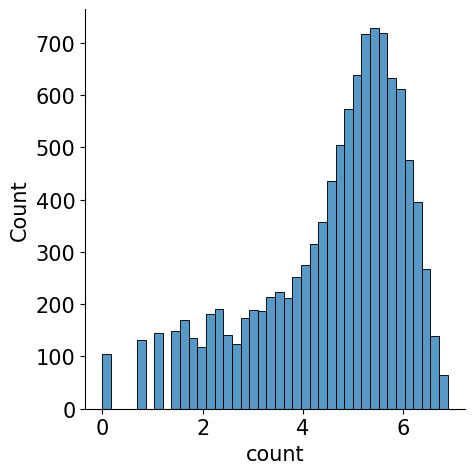

In [26]:
sns.displot(np.log(train['count']));

#### ✏️ 막대 그래프

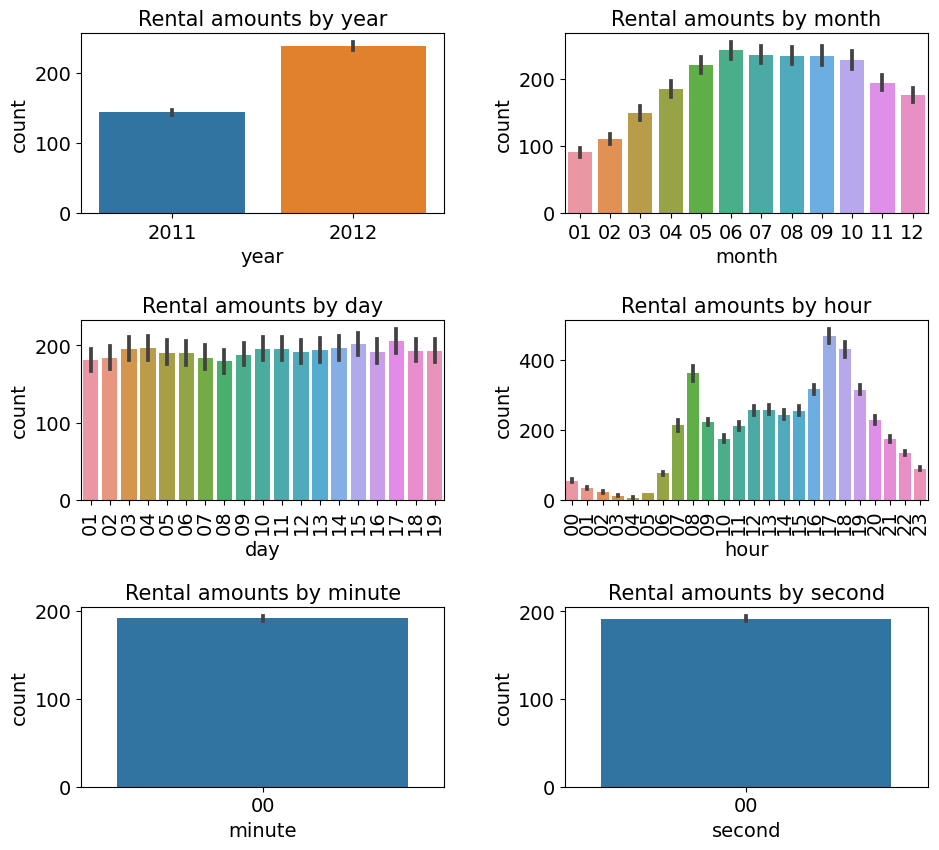

In [35]:
# 1) m행 n열 Figure 준비하기
mpl.rc('font', size=14)                       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)                  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout()                            # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9)                 # 전체 Figure 크기를 10X9인치로 설정

# 2) 각 축에 서브플롯 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 3) (선택) 세부설정 = 제목추가
axes[0,0].set(title = 'Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title = 'Rental amounts by day')
axes[1,1].set(title = 'Rental amounts by hour')
axes[2,0].set(title = 'Rental amounts by minute')
axes[2,1].set(title = 'Rental amounts by second')

# 4) (선택) 세부설정 = X축 라벨 겹치지 않게 개선
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

<Axes: xlabel='second', ylabel='count'>